<a href="https://colab.research.google.com/github/hajdekd/Data-Science-Projects/blob/main/Dalibor_Hajdek_Classification_Labipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

The dataset is covering a bank that is trying to attract more customers to invest in their bank. The bank is
planning to create a classification model to predict which customers have a higher possibility to apply for and
getting accepted for a personal loan. 

# Objective

* To predict which customers will apply for a personal loan.
* Which features are the most important in model building. 

# Data Description

1. ID: Customer ID
2. Age: Customer’s age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer (in thousand dollars)
5. ZIP Code: Home Address ZIP code.
6. Family: the Family size of the customer
7. CCAvg: Average spending on credit cards per month (in thousand dollars)
8. Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. (in thousand dollars)
10. Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities_Account: Does the customer have securities account with the bank?
12. CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Do customers use internet banking facilities?
14. CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Importing Needed Libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

# Loading Data

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
loan = pd.read_csv('/content/drive/MyDrive/Loan_dataset.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = loan.copy()

# Exploring the Data (EDA)

In [ ]:
# Viewing first 5 rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Viewing last 5 rows of the dataset
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#Getting the shape of the dataset
data.shape

(5000, 14)

Observation:

The dataset has 5000 rows and 14 columns

In [ ]:
#Printing the columns 
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
#Checking for duplicate records
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation:

* Target varaible CreditCard is integer type
* All of the variables are of integer type except for CCAvag, which is float.


In [ ]:
#Checking the dataset for missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Observation:

* There are no missing values in the dataset.

In [ ]:
#Getting the summary of the numerical varaibles
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Data Pre-processing

In [ ]:
#Droping irrelevant columns
data.drop(["ID"], axis=1, inplace=True)

In [ ]:
#Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


# Data Visualization

## Univariate Analysis

In [ ]:
# This function takes the numerical column as the input and returns the
# boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Age

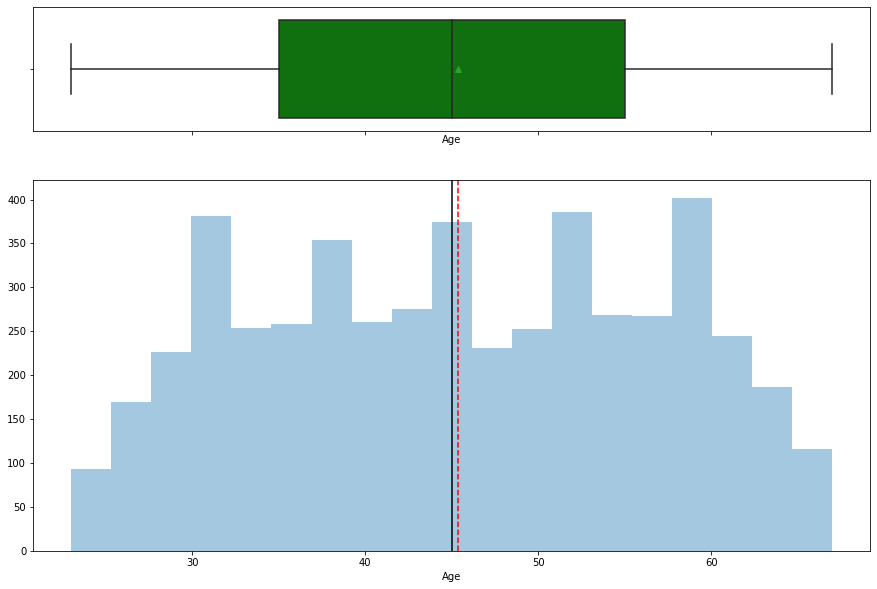

In [ ]:
histogram_boxplot(data["Age"])

Observation: 

* Age has relatively normal distribution.

### Experience

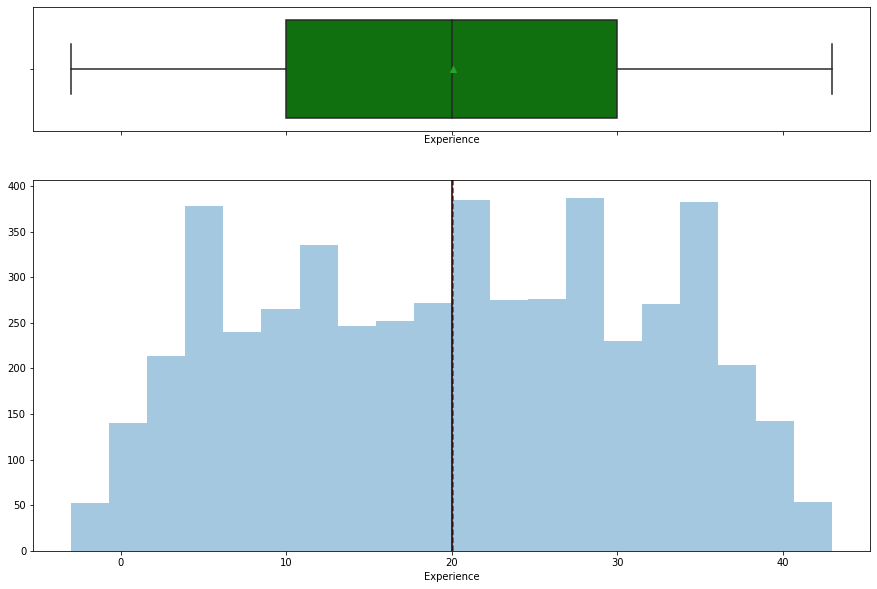

In [ ]:
histogram_boxplot(data["Experience"])

Observation: 

* Experience has normal distribution with both mean and median at 20.

### Income

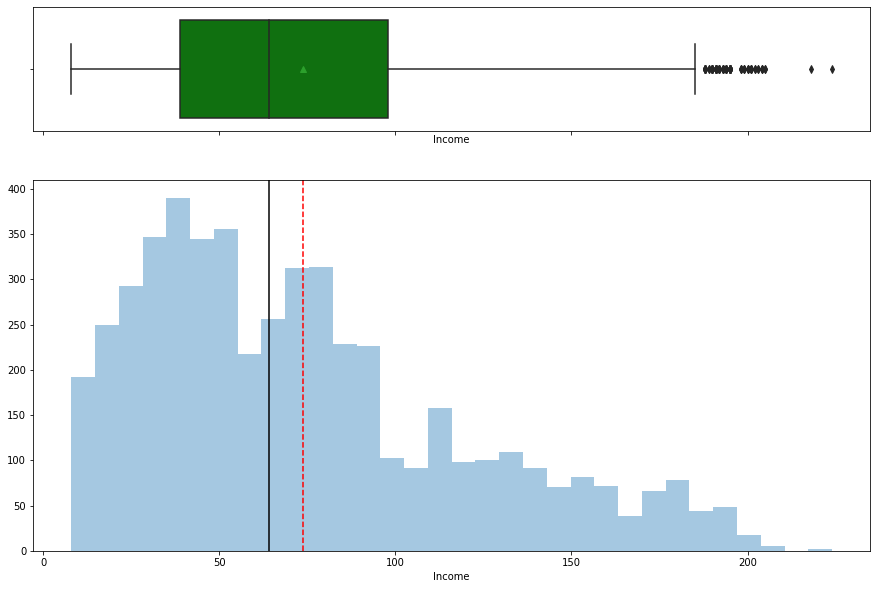

In [ ]:
histogram_boxplot(data["Income"])

Observation: 

* Income is right skewed.

ZIPCode

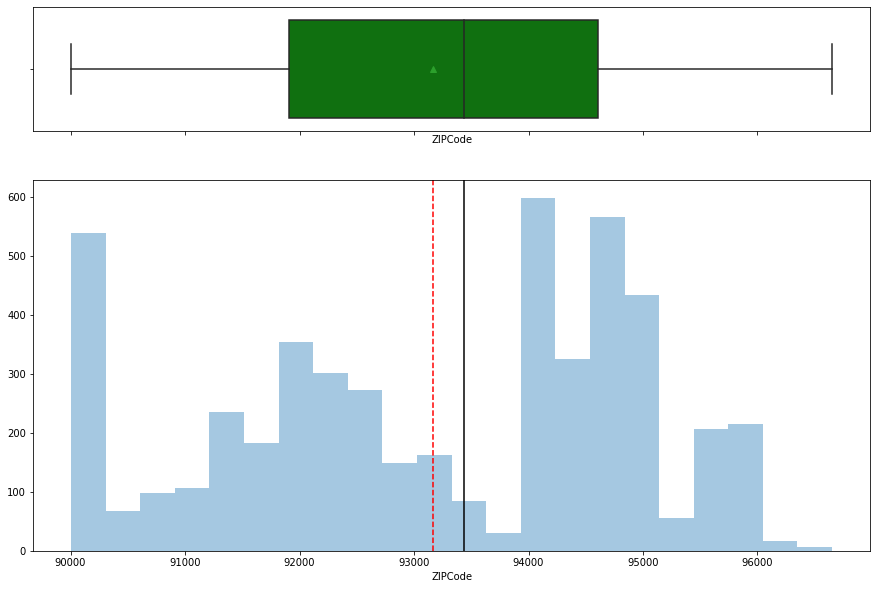

In [ ]:
histogram_boxplot(data["ZIPCode"])

Observation: 

* Most values for the ZipCode in the data set are at 9400.

### Family

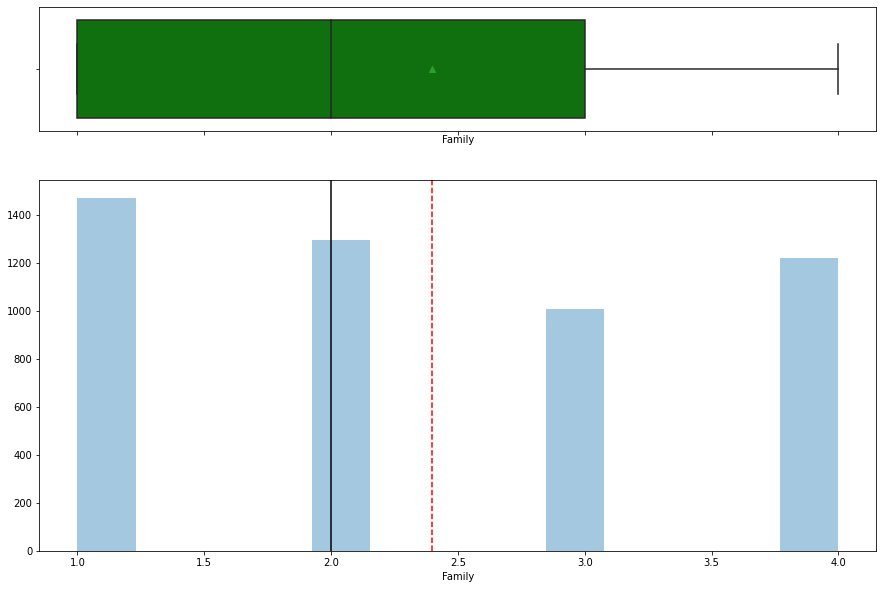

In [ ]:
histogram_boxplot(data["Family"])

Observation:

Most Families in the data set have single member followed by those with 2.

CCAvg

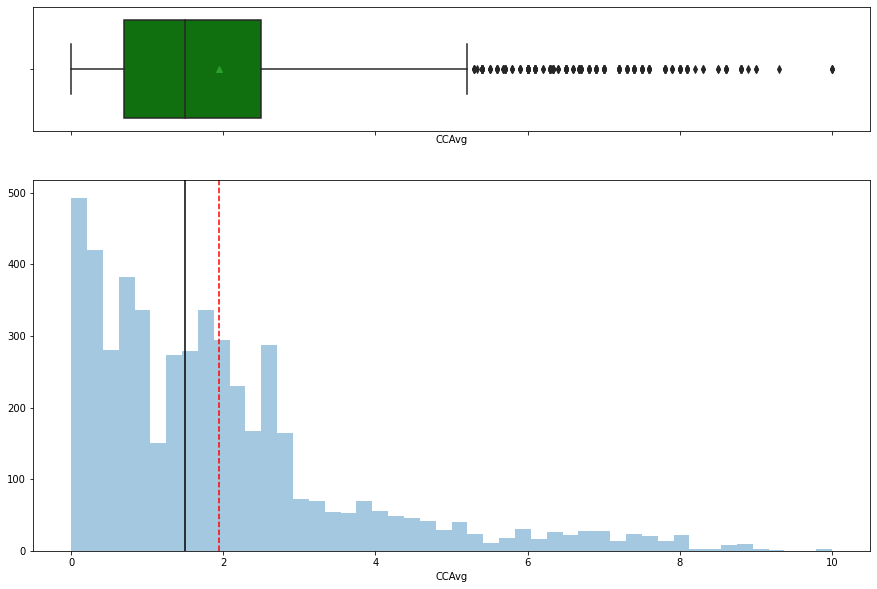

In [ ]:
histogram_boxplot(data["CCAvg"])

Observation:

CCAvg is right skewed.

Education

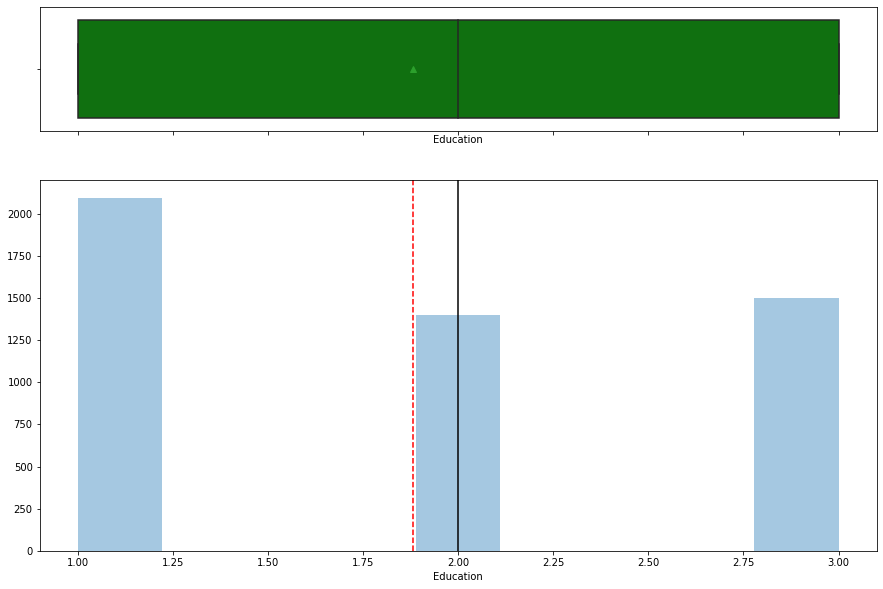

In [ ]:
histogram_boxplot(data["Education"])

Observation:

* Most values for education are at 1 or those with undergrad degree.

### Mortgage

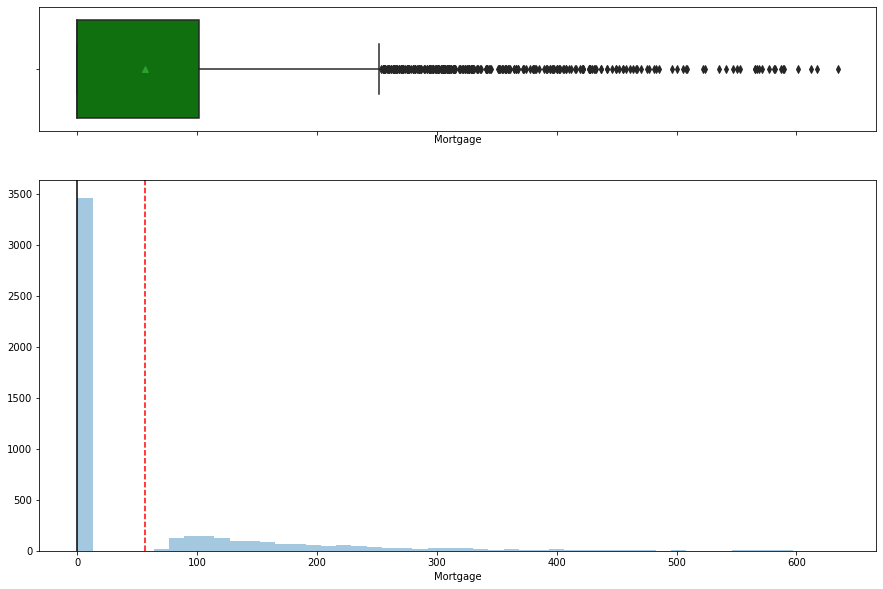

In [ ]:
histogram_boxplot(data["Mortgage"])

Observation:

* Almost 70% of values for Mortgage is at $0.

### Personal_Loan

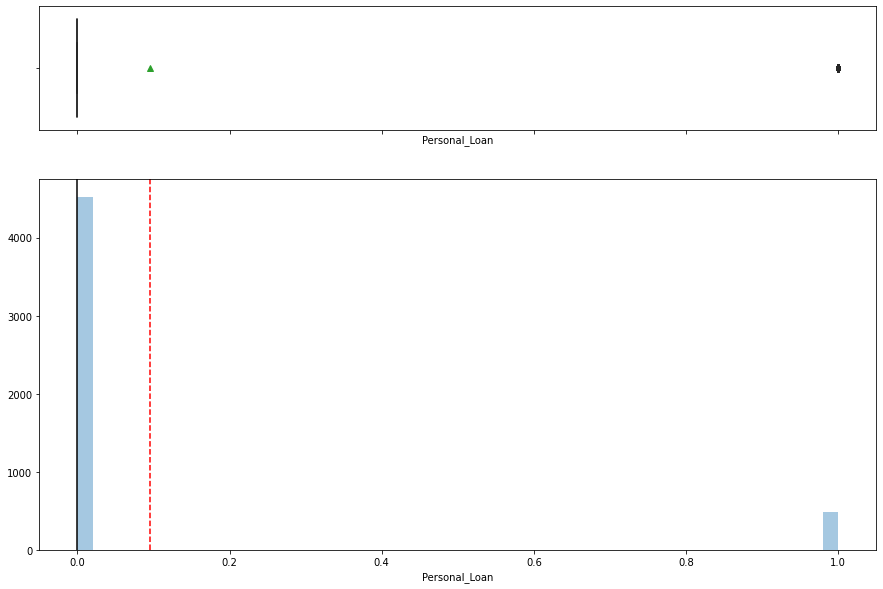

In [ ]:
histogram_boxplot(data["Personal_Loan"])

Observation:

* Around 90% in the data set did not acept personal loan previously.

### Securities_Account

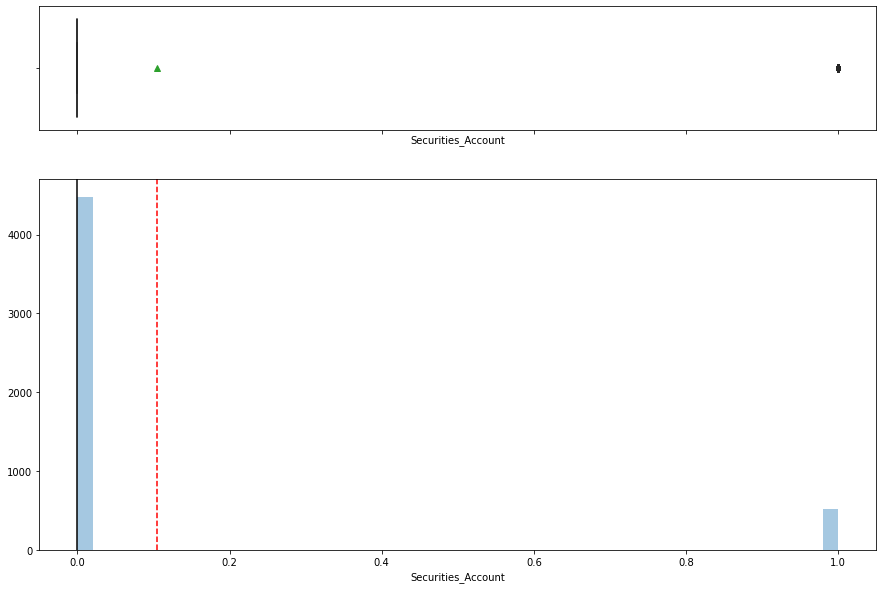

In [ ]:
histogram_boxplot(data["Securities_Account"])

Observation:

* Vast majority in the data set does not have security account.

### CD_Account

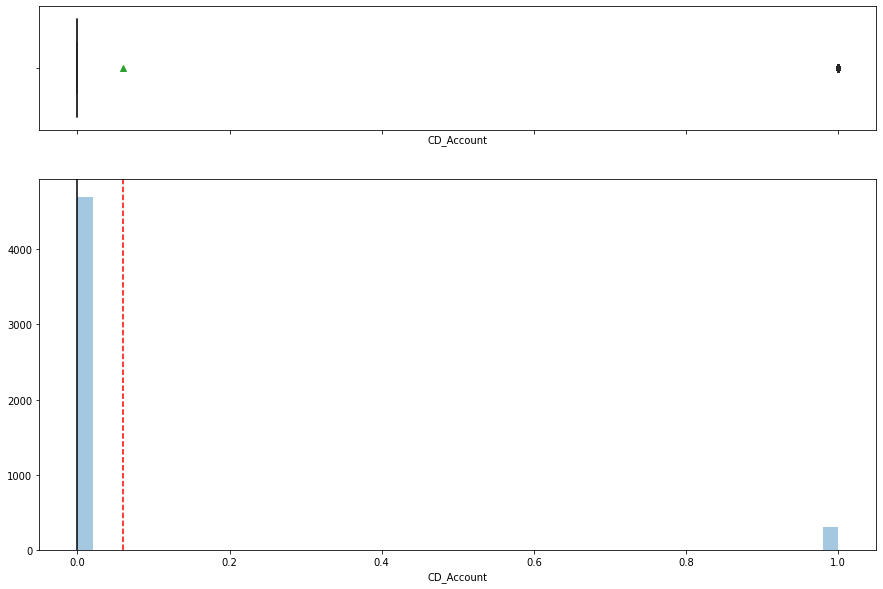

In [ ]:
histogram_boxplot(data["CD_Account"])

Observation:

* Similary, less than 5% in the data set does have an CD account.

### Online

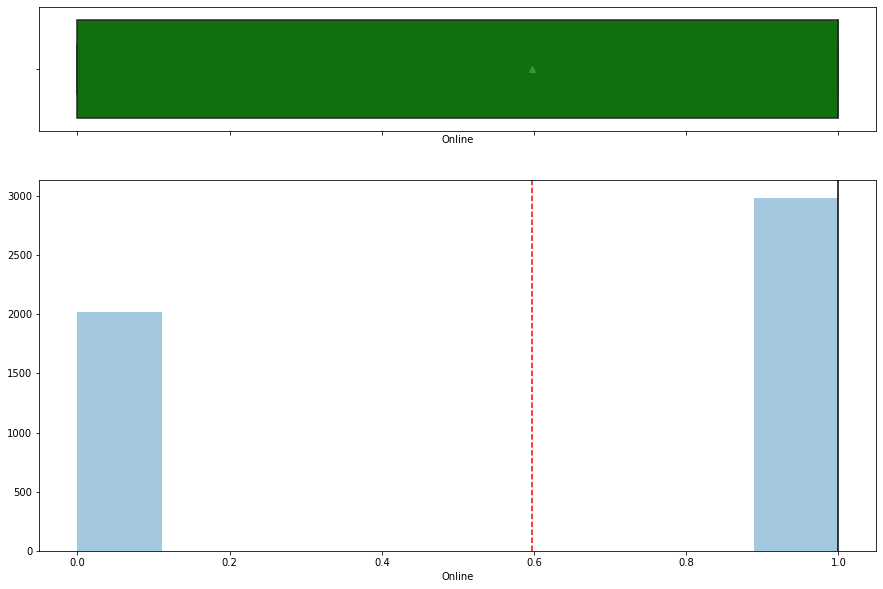

In [ ]:
histogram_boxplot(data["Online"])

Observation:

* Most customers in the data set utilize online banking.

CreditCard

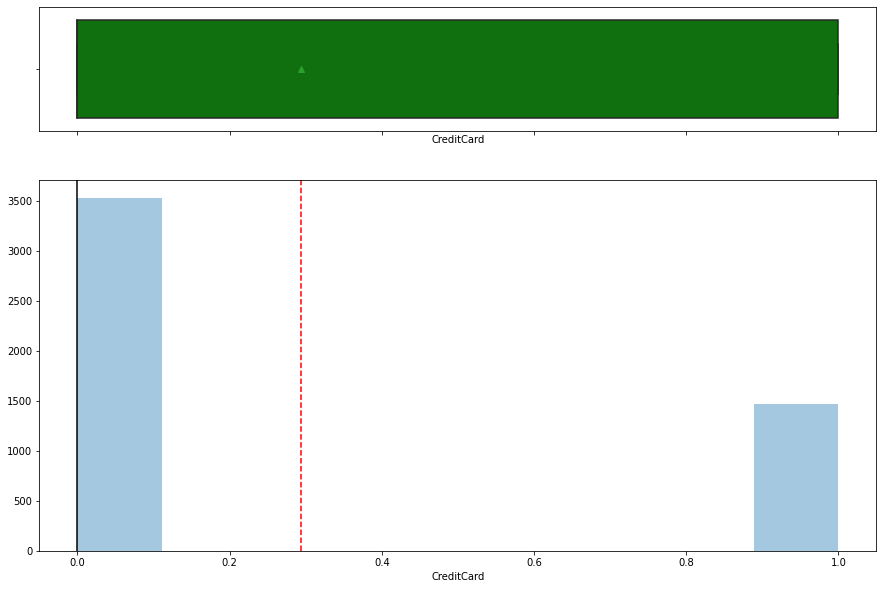

In [ ]:
histogram_boxplot(data["CreditCard"])

Observation:

* Most do not use any other credit cards.

## Bivariate analysis

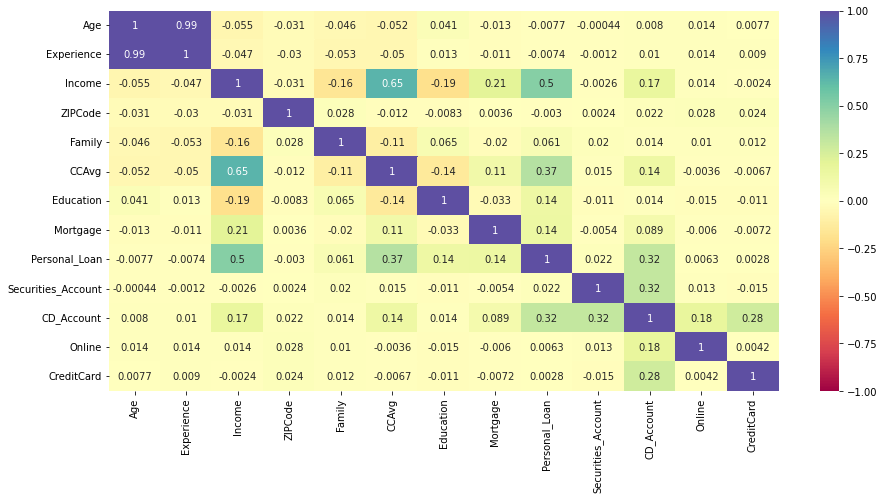

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

Observation:

*  Personal_Loan has the highest correlation with Income, follwoed by CCAvg and CD_Account.
* Age, Experience and ZipCode have the negative correlation with Personal_Loan.
* Experience and Age have the highest corelation between each other.

### Personal Loan vs Age, Experience, Income, Family,CCAvg and Education 

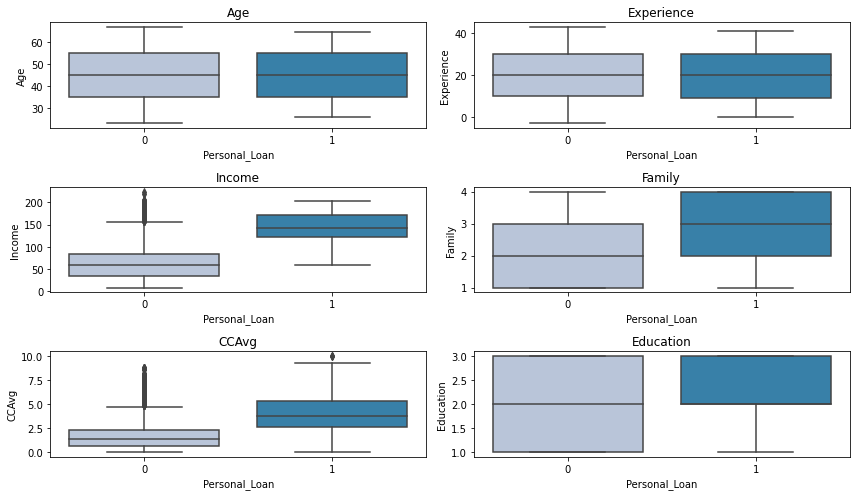

In [ ]:
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "CCAvg",
        "Education",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Observation:

* Customers with higher Income,  more family mambers and higher CCAvag have accepted personal loans. 

Personal_LOan vs Mortgage, Securities_Account, CD_Account, Online and Credit_Card

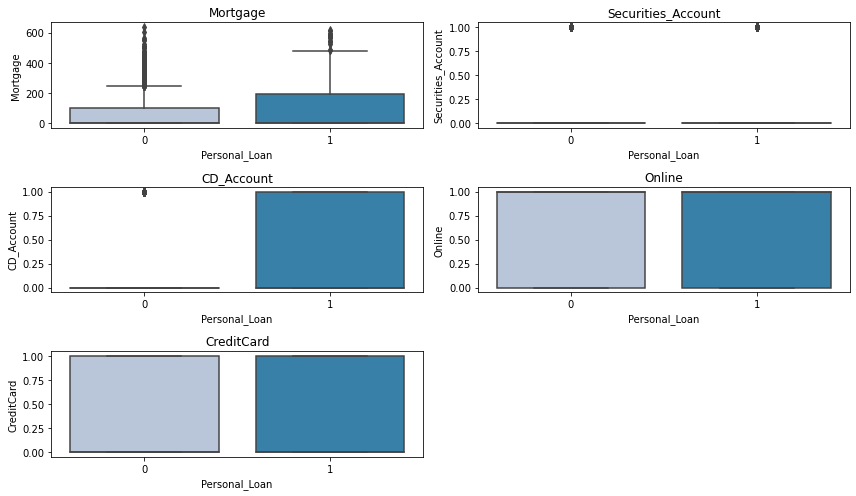

In [ ]:
cols = data[
    [
        "Mortgage",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard"
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observation: 

* Those with CD_Account and with Mortgage have used personal Loans more than those without. 

Personal_Loan vs Age

In [ ]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

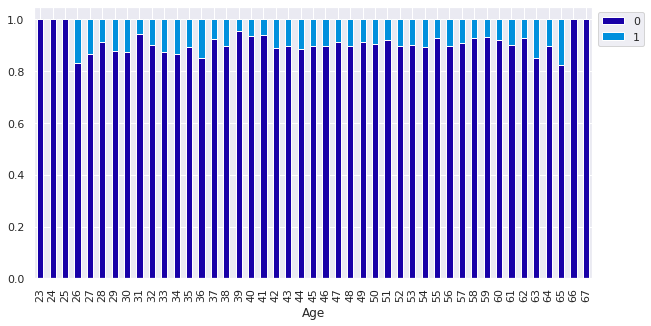

In [ ]:
stacked_plot(data["Age"])

Observation: 

* Those of age 23, 24, 66 and 67 did not accept personal loan.
* The others in between evenly contributed to taking loans. 

Personal_Loan vs Experience

Personal_Loan     0    1   All
Experience                    
-3                4    0     4
-2               15    0    15
-1               33    0    33
0                59    7    66
1                66    8    74
2                76    9    85
3               112   17   129
4               104    9   113
5               132   14   146
6               107   12   119
7               109   12   121
8               101   18   119
9               127   20   147
10              111    7   118
11              103   13   116
12               86   16   102
13              106   11   117
14              121    6   127
15              114    5   119
16              114   13   127
17              114   11   125
18              125   12   137
19              121   14   135
20              131   17   148
21              102   11   113
22              111   13   124
23              131   13   144
24              123    8   131
25              128   14   142
26              120   14   134
27      

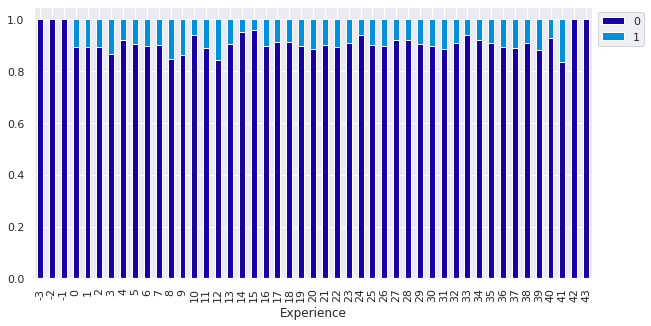

In [ ]:
stacked_plot(data["Experience"])

Observation:

* Similary, those without experience and with the most experience did not take loans. 

Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


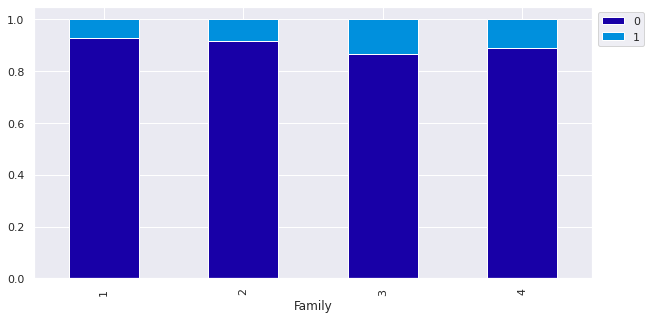

In [ ]:
stacked_plot(data["Family"])

Observation:

* Families with 3 memebers took more loans than those with 4,2 and 1 member. 

Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


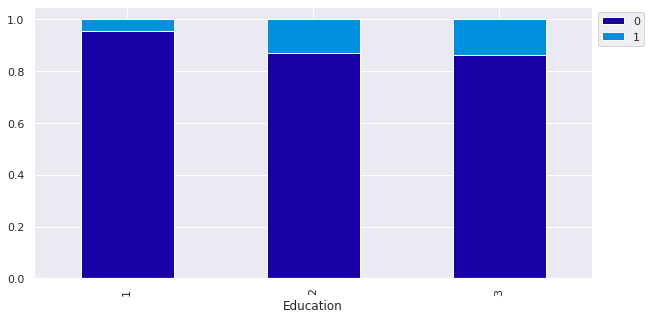

In [ ]:
stacked_plot(data["Education"])

Observation:

* Customers with higher level of education, with graduate and advanced degrees, accepted loans more than those with undergraduate level.

Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


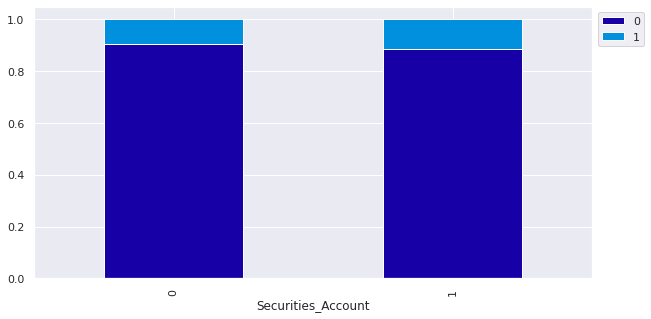

In [ ]:
stacked_plot(data["Securities_Account"])

Observation:

* Customers with or wihout securities account almost evenly accepted loans.

Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


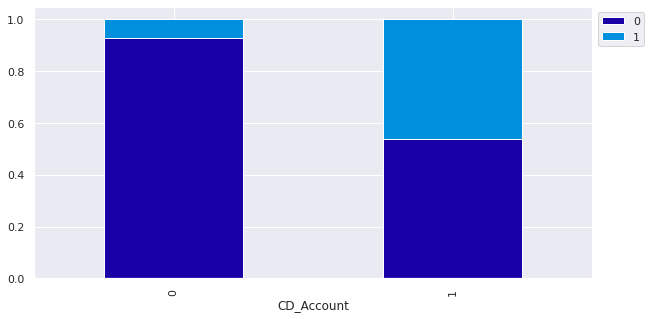

In [ ]:
stacked_plot(data["CD_Account"])

Observation:

* Customers with CD_Account accepted loans more than those without. 

Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


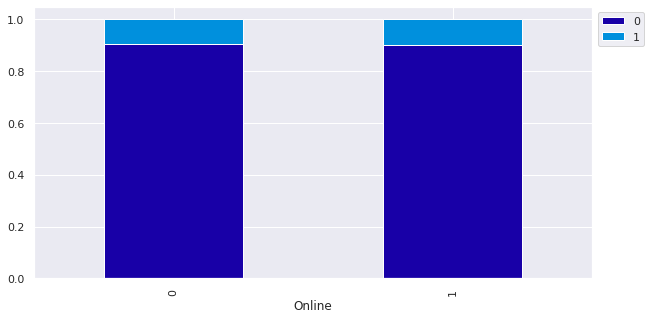

In [ ]:
stacked_plot(data["Online"])

Observation:

* Clients who utilize Online banking and those that do not relatively evenly accepted loans.

Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


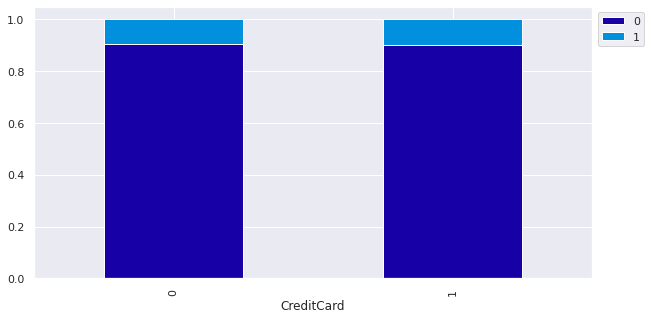

In [ ]:
stacked_plot(data["CreditCard"])

* Clients who used Credit card and those that do not evenly accepted loans.

# EDA Summary

**Data Description:**

* There are no duplicate values in the dataset.
* There are no missing values in the dataset.
* All values are of either **int64** except for CCAvg variable which is **float64**.


**EDA Observations:**

* Youngest and oldest clients, as well as those with the least and most experience  did not accept loan. 
* Families with 3 members accepted the loan with the highest rate, which was 13.2%.
* Clients with advanced degrees are the ones who took the loan more than the other 2 categories. They accepted the loan at rate of 13.7%.
* Consumers who have Securities account, those who utilize online banking, and those who use credit card acccepted the loan at the same level as those who do not. 
* Clients with CD account accepted the loan at 46% rate. 


# Model Building

In [ ]:
column_names = list(data.columns)
column_names.remove(
    "Personal_Loan"
)  # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


## Data Splitting

1. Defining X and y
2. Splitting dataset into training and test 

In [ ]:
X = data.drop("Personal_Loan", axis=1)  # Features
y = data["Personal_Loan"]  # Labels (Target Variable)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 12) (1500, 12)


## Building Model 1 - Decision Tree Without Any Hyperparameters

In [ ]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.10, 1: 0.90}, random_state=1
)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [ ]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

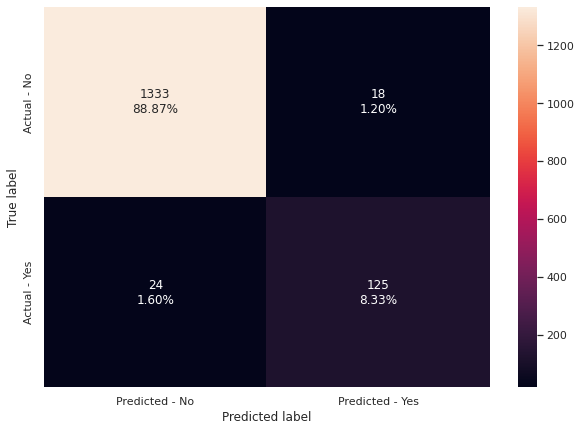

In [ ]:
make_confusion_matrix(model, y_test)

In [ ]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

Observation: 

* There is 9% of positive classes with 91 % accuracy. 

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

In [ ]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8389261744966443


Observation: 

* Recall on test set is relatively high but it is overfitting on the training set. 

## Visualizing the Decision Tree

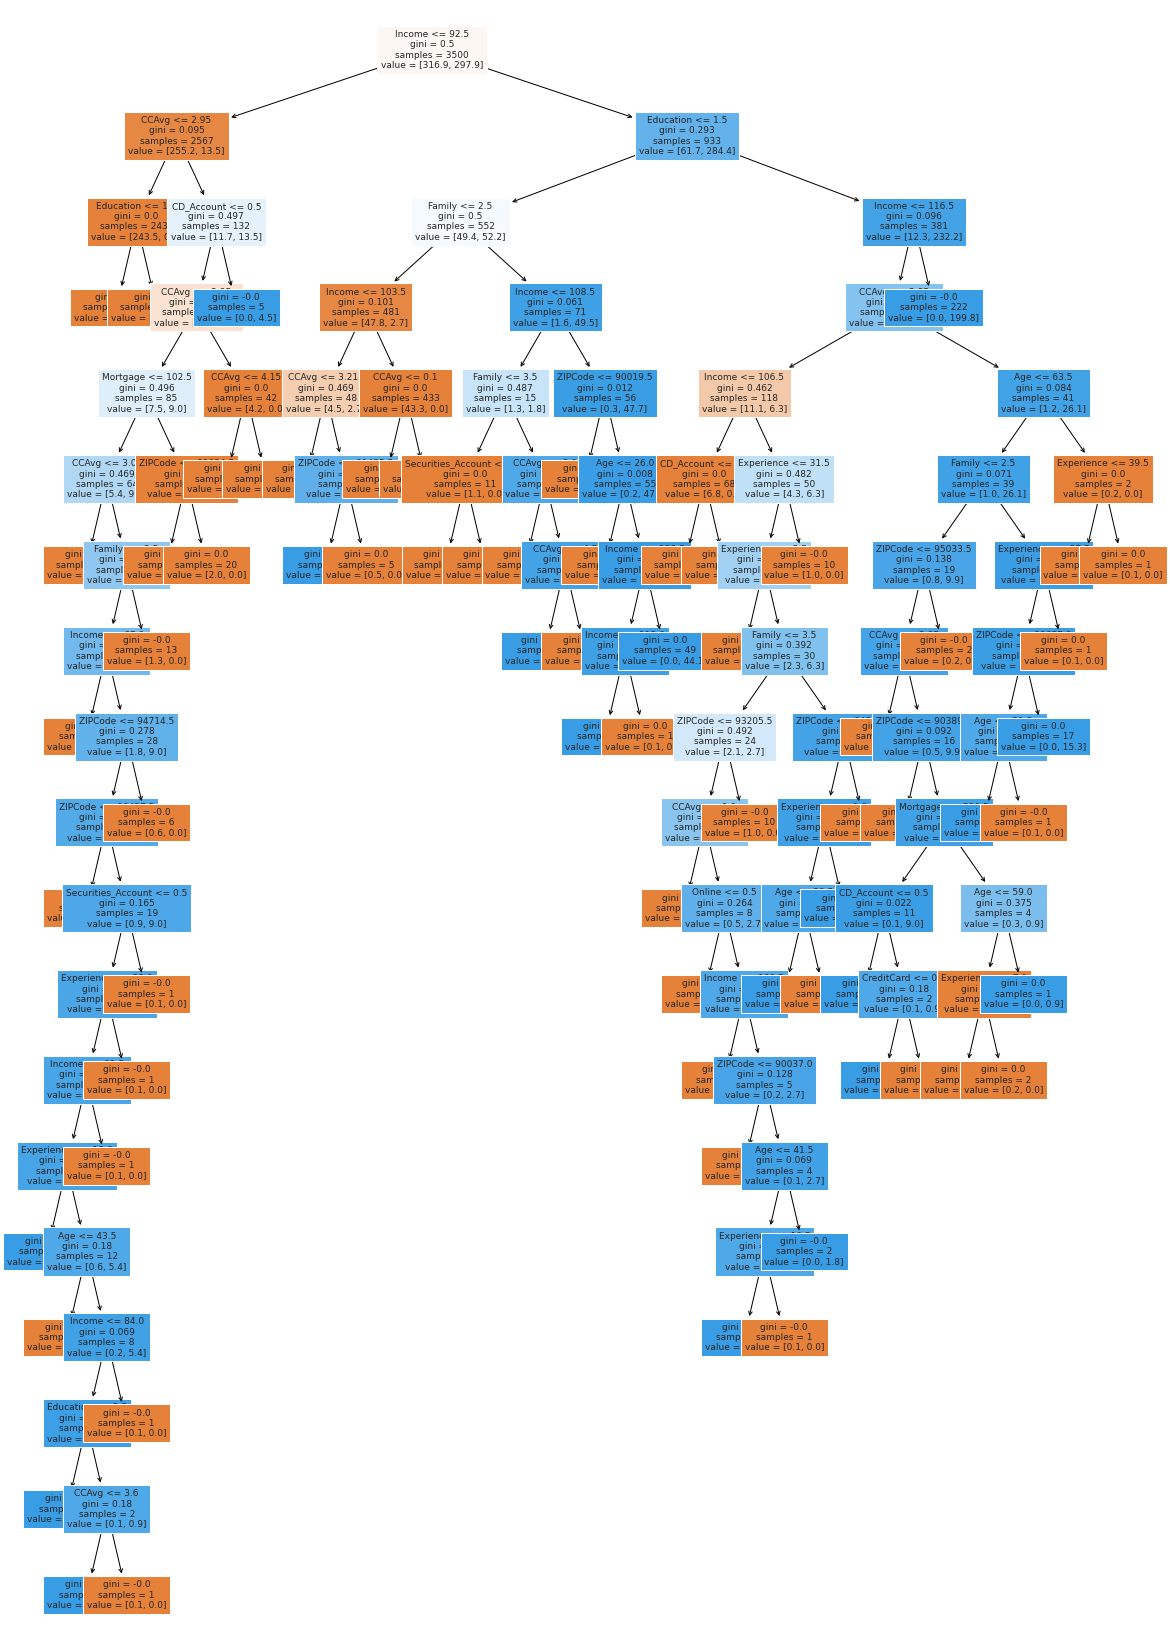

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- Education <= 1.50
|   |   |   |--- weights: [84.40, 0.00] class: 0
|   |   |--- Education >  1.50
|   |   |   |--- weights: [159.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [0.80, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- ZIPCode <= 94714.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90437.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- ZIPCode >  90437.50
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account <=

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.628496
Family              0.149090
CCAvg               0.090772
Education           0.088874
ZIPCode             0.013413
CD_Account          0.007748
Experience          0.007645
Age                 0.006787
Mortgage            0.005057
Online              0.000989
CreditCard          0.000586
Securities_Account  0.000544


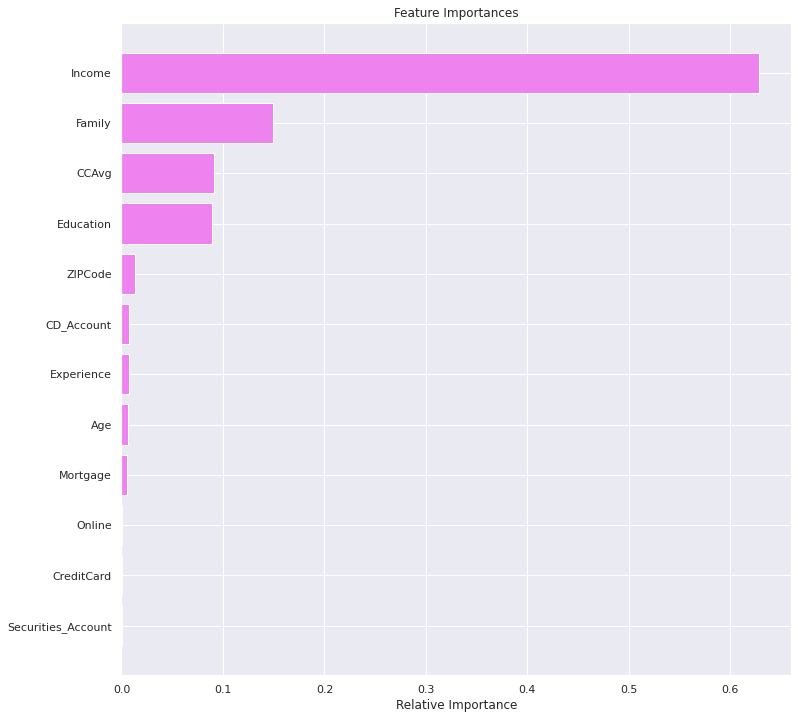

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:

* Based on the descission tree model, income is the most important vaiable for predicting loan acceptence. 

## Building Model 2 - Decision Tree With Hyperparameters


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=2, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

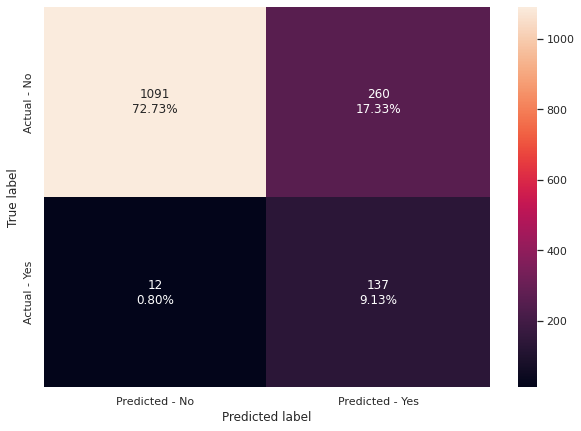

In [ ]:
make_confusion_matrix(estimator, y_test)

In [ ]:
get_recall_score(estimator)

Recall on training set :  0.9516616314199395
Recall on test set :  0.9194630872483222


Observation: 

Recall is significantly better on training and test sets after applying hyperparameter tunning.

Observation:

## Visualizing the Decision Tree

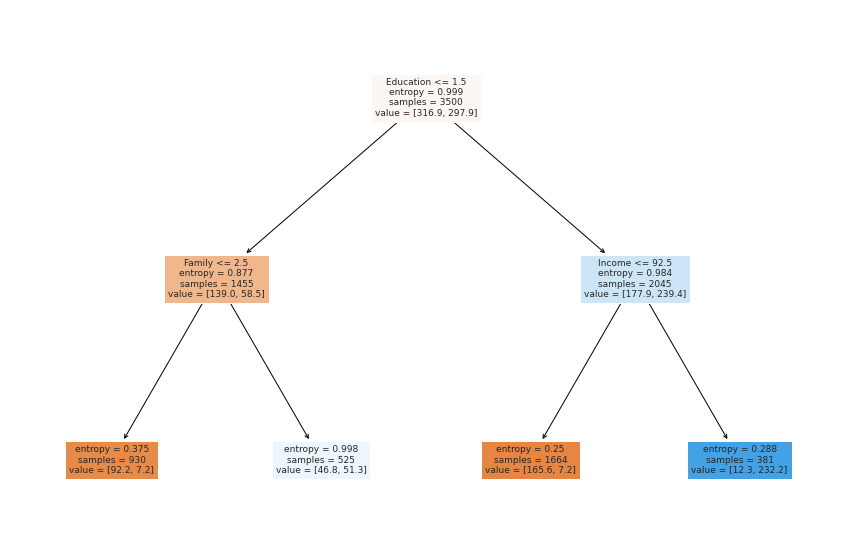

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Education <= 1.50
|   |--- Family <= 2.50
|   |   |--- weights: [92.20, 7.20] class: 0
|   |--- Family >  2.50
|   |   |--- weights: [46.80, 51.30] class: 1
|--- Education >  1.50
|   |--- Income <= 92.50
|   |   |--- weights: [165.60, 7.20] class: 0
|   |--- Income >  92.50
|   |   |--- weights: [12.30, 232.20] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.812879
Family              0.103677
Education           0.083444
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
CCAvg               0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


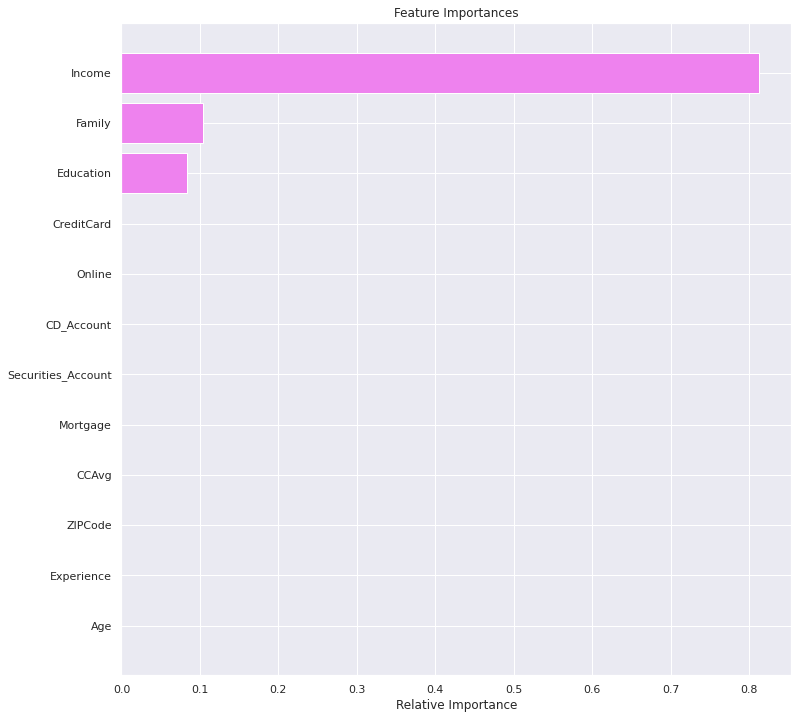

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:

* According to the model 2, Income is again the most significant varaible for predicting loan acceptance. 

## Building Model 3 - Decision Tree With Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-2.554488e-15
1,3.792239e-19,-2.554109e-15
2,3.575539e-18,-2.550533e-15
3,9.029140e-18,-2.541504e-15
4,2.275343e-17,-2.518751e-15
5,4.543463e-17,-2.473316e-15
6,1.642039e-16,-2.309112e-15
7,2.419448e-16,-2.067167e-15
8,5.716348e-15,3.649181e-15
9,1.568454e-04,3.136909e-04


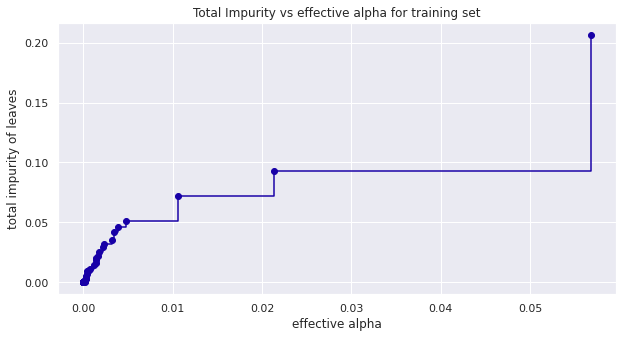

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.10, 1: 0.90}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29287854019800486


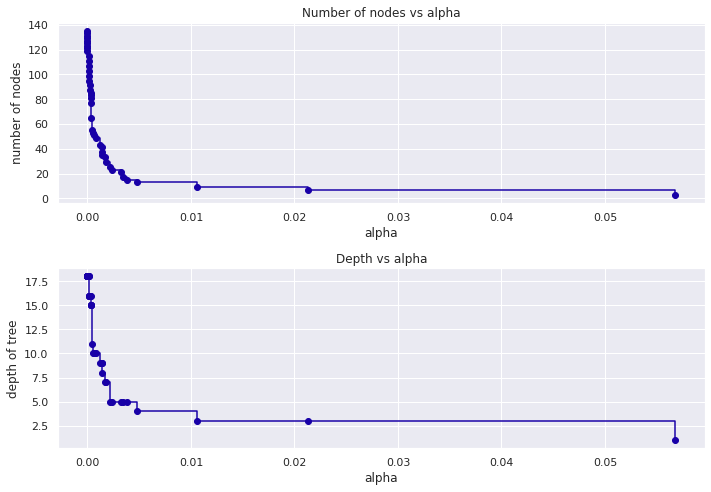

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

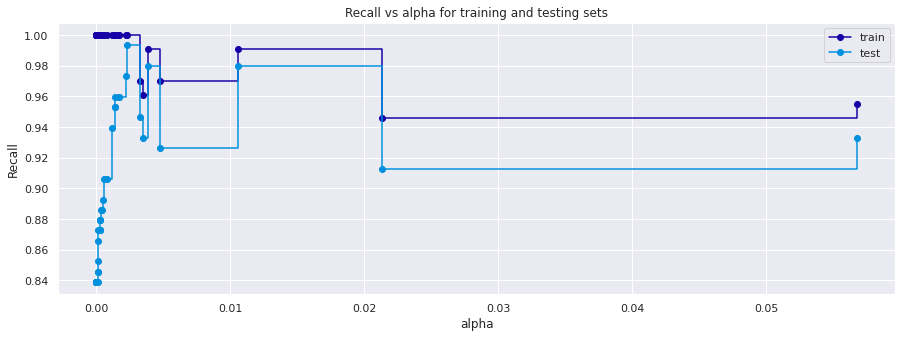

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Observation:

*  Comapring the recall and alpha values, we see that maximum value of recall is close to 0.06. 

In [ ]:
# let's modify the model and create a model that gives us the highest train and test recall
# we call this model the "best_model"
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002328917016620184,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002328917016620184,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

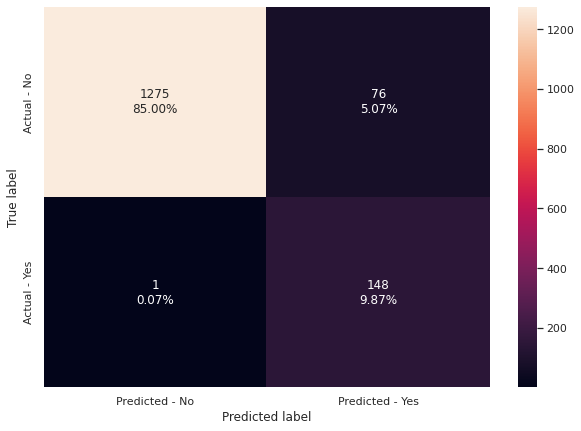

In [ ]:
make_confusion_matrix(best_model, y_test)

In [ ]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.9932885906040269


Observation:

* Recall score on the training set is overfitting.

## Visualizing the Decision Tree

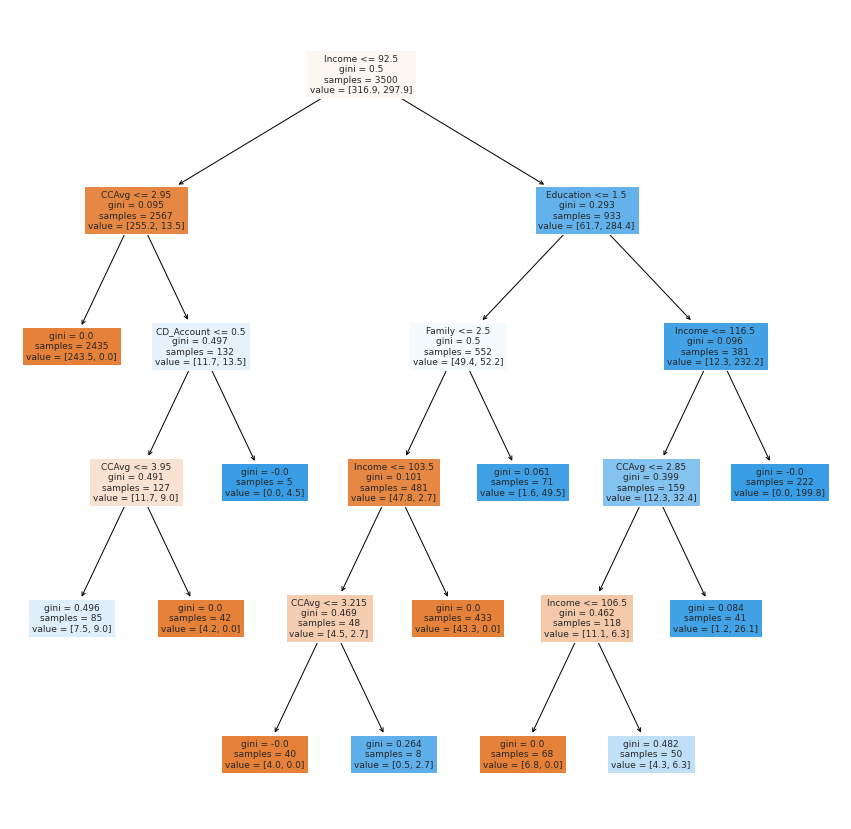

In [ ]:
plt.figure(figsize=(15, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [7.50, 9.00] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [0.50, 2.70] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [43.30, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.60, 49.50] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- we

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.661588
Family              0.147962
Education           0.094853
CCAvg               0.087384
CD_Account          0.008213
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


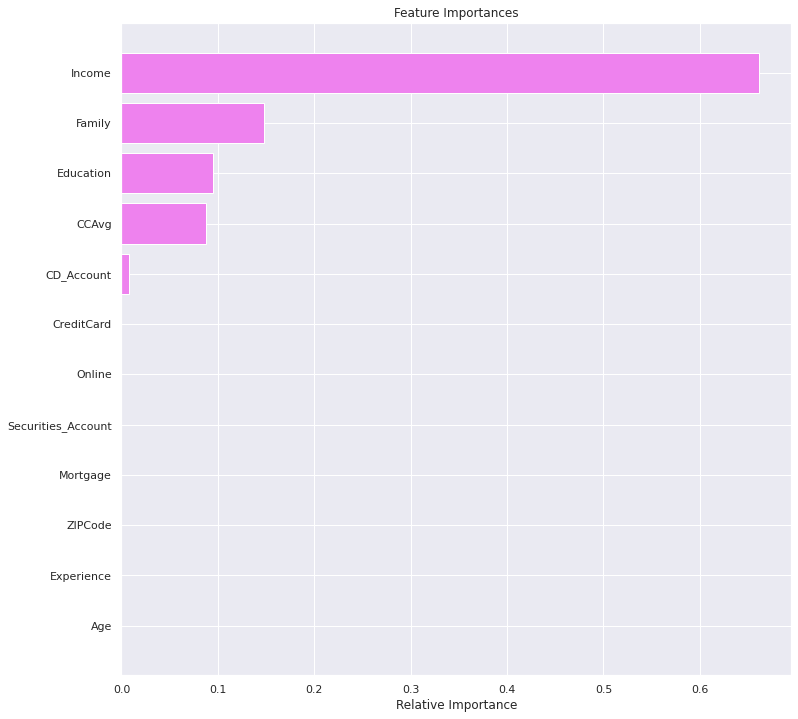

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


Observation:

* Model 3 also indicates that Income and Family size are the most important varaibles for predicting loan acceptance. 

## Comparing all the decision tree models

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision treee with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [1, 0.95, 1],
        "Test_Recall": [0.84, 0.92, 0.99],
    }
)
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.84
1,Decision treee with hyperparameter tuning,0.95,0.92
2,Decision tree with post-pruning,1.00,0.99


Observation: 

* Decision treee with hyperparameter tuning	model produced the best recall scores. 

## Conclusions: 

* According to Bivariate analysis, Personal_Loan has the highest correlation with Income, follwoed by CCAvg and CD_Account.
* On the other hand, the same analysis shows that Age, Experience and ZipCode have the lowest correlation with Personal_Loan.
* 3 different models are bulilt in this classification analysis: 
    1. Decision Tree Without Any Hyperparameters 
    2. Decision Tree With Hyperparameters 
    3. Decision Tree With Cost Complexity Pruning. 
* Model 1 produced Recall score 1 on the training set and 0.84 on the test set.
* Feature importance in Model 1 showed that the most significant varaible for predicting loan acceptance is Income.
*  Model 2 produced Recall score 0.95 on the training set and 0.92 on the test set.
* Like in Model 1, Feature importance in Model 2 showed that the most significant varaible for predicting loan acceptance is Income.
* Model 3 produced Recall score 1.0 on the training set and 0.99 on the test set.
* Again, Feature importance in Model 3 showed that the most significant varaible for predicting loan acceptance is Income.
* Decision Tree With Hyperparameters model produced the best results as far as the recall scores.